In [24]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

#Lundquist Griffin griffin.lundquist@studio.unibo.it,
#McCallan Oliver, oliver.mccallan@studio.unibo.it
#Mendoza Alberto, alberto.mendozaperea@studio.unibo.it
#Simon Christopher, ronald.simon@studio.unibo.it
#Lanccetti Valerico, valerico.laccetti@studio.unibo.it




import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [25]:
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook
                             
url_train = 'train.csv'
train = pd.read_csv(url_train)
print(f"Shape of the training data {train.shape}")

url_test = 'test.csv'
test = pd.read_csv(url_test)
print(f"Shape of the test data {test.shape}")

Shape of the training data (200000, 77)
Shape of the test data (100000, 76)


In [26]:
test.drop(columns=['id'], inplace = True)
train.drop(columns=['id'], inplace = True)

In [27]:
train.dropna(axis = 0, inplace = True)
test.dropna(axis = 0, inplace = True)

In [28]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [29]:
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0


In [30]:
print(train.shape, test.shape)

(200000, 76) (100000, 75)


In [31]:
Xfull, y = train.drop(columns=['target']), train['target']
print(Xfull.shape, y.shape)

(200000, 75) (200000,)


In [32]:
# number of unique values
y.unique() # we have 9 different classes 

array(['Class_6', 'Class_2', 'Class_8', 'Class_3', 'Class_1', 'Class_5',
       'Class_7', 'Class_9', 'Class_4'], dtype=object)

In [33]:
# show X_full
Xfull.head() 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
le = LabelEncoder()
y = le.fit_transform(y) # transform the labels in numeric characters, return array

np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [37]:
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


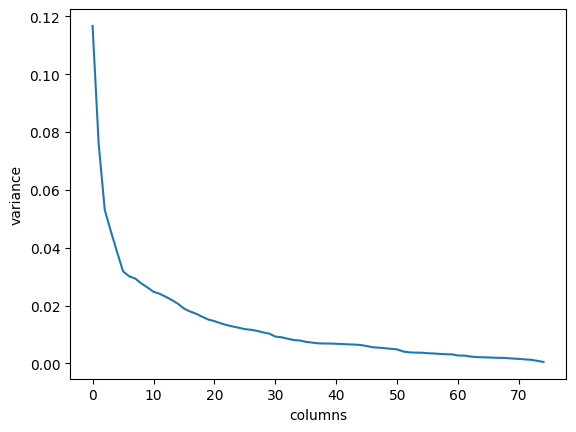

In [38]:
# PCA 
pca = PCA(n_components=len(Xfull.columns), svd_solver='full') # select all the components 
Xtrans = pca.fit_transform(Xfull) # transformed dataset , return array 

plt.plot(range(len(Xfull.columns)), pca.explained_variance_ratio_)
plt.xlabel('columns')
plt.ylabel('variance')
plt.show()

In [39]:
# Sort the explained variance ratios in descending order, they are already sorted (as we can see from the plot above)
ratios = pca.explained_variance_ratio_
#ratios_sorted = sorted(ratios, reverse=True) --> the ratio is already sorted

# Calculate the cumulative sum of the explained variance ratios
ratioscs = np.cumsum(ratios)

# Find the index idx of the first principal component where the cumulative sum exceeds 0.9
idx = np.argmax(ratioscs > 0.9)

print(f"we keep the first {idx+1} columns of Xfull")
    
# Keep the first idx+1 components and discard the rest
X = pca.transform(Xfull)[:,:idx+1]
print(X.shape)

we keep the first 44 columns of Xfull
(200000, 44)


In [40]:
X

array([[-9.32643548e+00,  1.40465104e+00, -2.61610037e+00, ...,
         4.80123109e+00,  6.06910767e-01, -9.37888829e-01],
       [-1.34487677e+01,  2.85156524e+00, -2.28921258e+00, ...,
        -3.49813030e-01, -4.10885394e-02,  2.12981591e-01],
       [-7.38647510e+00,  4.85378179e+00, -2.18886032e+00, ...,
        -1.71401719e+00, -4.20278000e-01, -3.85473384e-01],
       ...,
       [ 3.12719731e+01, -3.28702588e+01,  6.80983063e+01, ...,
         2.35983068e+00,  1.21927862e+00, -1.76728424e+00],
       [-1.17794475e+01,  3.00202905e+00, -2.36336457e+00, ...,
         1.24995259e+00,  1.09243878e+00,  1.77063997e+00],
       [ 1.90893703e+01, -8.29669061e+00, -1.03535639e+01, ...,
         5.47162175e+00, -5.37185755e-01, -7.85138546e-01]])

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.01, random_state=random_state)
print(f"we have {Xtrain.shape[0]} samples for train")
print(f"we have {Xtest.shape[0]} samples for test")
print(f"each datasets has {Xtrain.shape[1]} features")

we have 2000 samples for train
we have 198000 samples for test
each datasets has 44 features


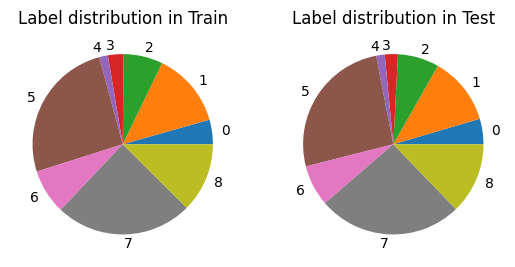

In [42]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(ytrain, return_counts=True)[1], labels=np.unique(ytrain, return_counts=True)[0])
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(ytest, return_counts=True)[1], labels=np.unique(ytest, return_counts=True)[0])
ax2.set_title("Label distribution in Test")
plt.show()

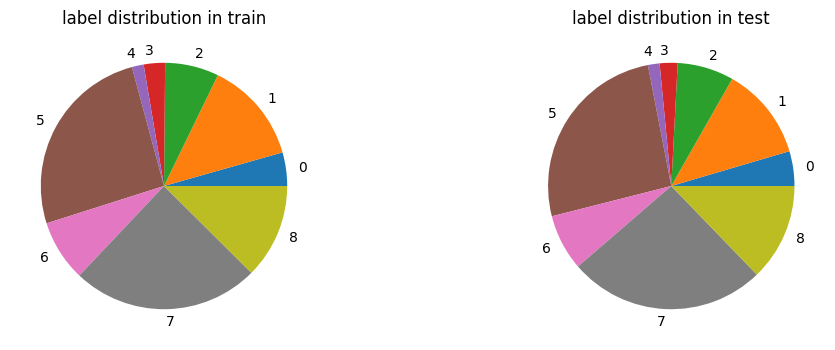

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.pie(np.unique(ytrain, return_counts=True)[1], labels=np.unique(ytrain, return_counts=True)[0])
plt.title('label distribution in train')
plt.subplot(1, 2, 2)
plt.pie(np.unique(ytest, return_counts=True)[1], labels=np.unique(ytest, return_counts=True)[0])
plt.title('label distribution in test')
plt.show()

In [48]:
# same distribution for train a test sets --> well done !!!

In [49]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [50]:
from sklearn.model_selection import ParameterGrid # return all the possible combination of hyperparameters 
trials = {lbl: len(list(ParameterGrid(models[lbl]['param']))) for lbl in model_lbls}
trials

{'dt': 38, 'rf': 56}

In [51]:
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params','ypred','accuracy','precision_macro','recall_macro','f1_macro'])

In [52]:
# grid search cv

# loop over score function 
for scoring in scorings:
    # loop over model 
    for m in model_lbls:
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'],
                           scoring = scoring,
                           )
        clf.fit(Xtrain, ytrain)
        clfs.append(clf)
        y_true, y_pred = ytest, clf.predict(Xtest)
        # y_preds.append(y_pred)
        cr = classification_report(y_true,y_pred, output_dict=True
                                   , zero_division=1
                                   )
        results.loc[len(results)] = [scoring,models[m]['name'],clf.best_params_,y_pred,
                                    ,cr['accuracy']
                                    ,cr['macro avg']['precision']
                                    ,cr['macro avg']['recall']
                                    ,cr['macro avg']['f1-score']]

In [55]:
for score in scorings:
    scoring_filter = score
    display(results[results.scoring==scoring_filter]\
                .sort_values(by=scoring_filter,ascending=False)\
                .drop('scoring',axis=1)\
                .style.format(precision=3)\
                .set_caption('Results for scoring "{}"'.format(scoring_filter)))

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 8, 'n_estimators': 20}",0.321,0.162,0.161,0.357
0,Decision Tree,"{'class_weight': None, 'max_depth': 4}",0.290,0.669,0.151,0.124


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.268,0.151,0.162,0.152
2,Decision Tree,"{'class_weight': None, 'max_depth': 9}",0.254,0.143,0.145,0.140


In [56]:
from sklearn.metrics import confusion_matrix 

best_clfs = []

for score in scorings:
    scoring_filter = score
    best_row = results[results['scoring']==scoring_filter].iloc[0,:]
    ypred = best_row['ypred']
    estimator = best_row['model']
    best_clfs.append((score, estimator))
    cm = confusion_matrix(ypred, ytest)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.title(f"Best Model for {score}: {estimator}")
    disp.plot()

KeyError: 'ypred'

In [ ]:
# final test with best model trained on all (train) data

In [ ]:
# make prediction 

test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0
